In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Data Merge

In [30]:
imdbDF = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
imdbDF.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
imdbDF2 = pd.read_csv('/kaggle/input/imdb-sentiments/train.csv')
imdbDF2.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [32]:
imdbDF.loc[0, 'review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [33]:
imdbDF2.loc[0, 'text']

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

The shape of the dataframe is: (50000, 2)
The count distribution of the sentiment column is shown below.


<AxesSubplot:>

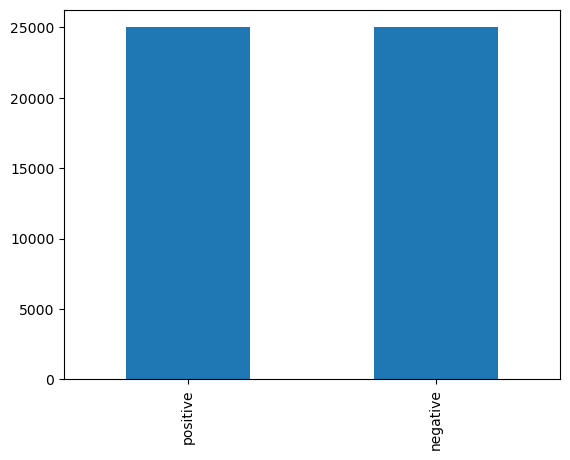

In [34]:
print("The shape of the dataframe is: " + str(imdbDF.shape))
print("The count distribution of the sentiment column is shown below.")
imdbDF['sentiment'].value_counts().plot(kind = 'bar')

It is a balanced dataset as can be seen from the value counts distribution. We can therefore, proceed to data cleaning and EDA.

The shape of the dataframe is: (25000, 2)
The count distribution of the sentiment column is shown below.


<AxesSubplot:>

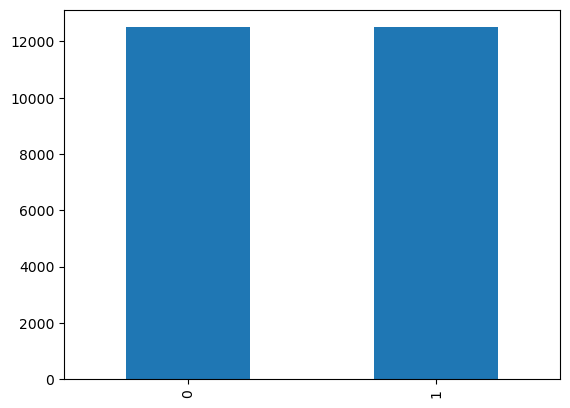

In [35]:
print("The shape of the dataframe is: " + str(imdbDF2.shape))
print("The count distribution of the sentiment column is shown below.")
imdbDF2['sentiment'].value_counts().plot(kind = 'bar')

We now convert positive and negative to 0 and 1 respectively, to follow the dataset specifications of the Large Movie Review Benchmark Dataset by Stanford.

<AxesSubplot:>

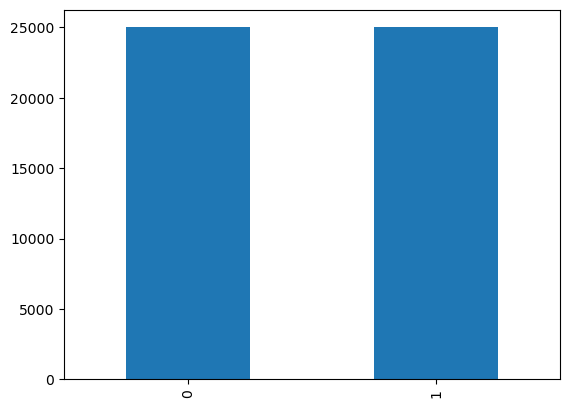

In [36]:
imdbDF.loc[imdbDF['sentiment'] == 'positive', 'sentiment'] = 0
imdbDF.loc[imdbDF['sentiment'] == 'negative', 'sentiment'] = 1
imdbDF['sentiment'].value_counts().plot(kind = 'bar')

In [37]:
imdbDF = imdbDF.rename(columns = {'review' : 'text'})

In [38]:
imdbDF.head()

,text,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


We have now converted the first dataset to follow the benchmark dataset standards. It is now time to merge the two datasets.

In [44]:
combinedDF = pd.concat([imdbDF, imdbDF2]).reset_index(drop = True)
print("The shape of the combined dataframe is " + str(combinedDF.shape))
combinedDF.head()

The shape of the combined dataframe is (75000, 2)


,text,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [45]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       75000 non-null  object
 1   sentiment  75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


We note that there are no null values present in the dataframe. Therefore, we do not need to perform any checks or row removals for null values.

<AxesSubplot:>

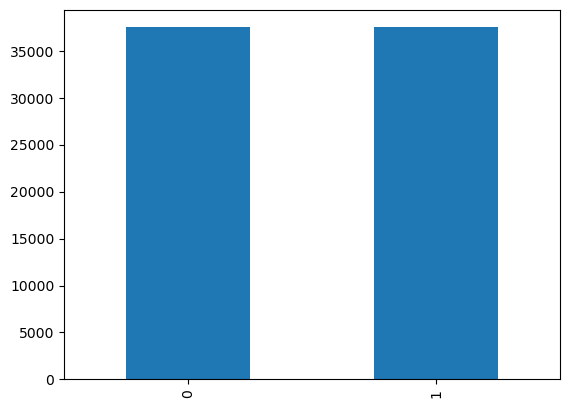

In [46]:
combinedDF['sentiment'].value_counts().plot(kind = 'bar')

We notice that we have equal number of datapoints for both positive and negative sentiments at 37500 per sentiment. This indicates a balanced dataset. Therefore, we do not require upsampling or downsampling to generate a balanced dataset.

In [47]:
combinedDF.to_csv('training.csv', index = False)